### 1. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.
#### A - результаты для выборки людей получающих препарат А.

#### B - результаты для другой выборки людей, получающих препарат B.

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np

In [2]:
np.random.seed(11)
A = stats.norm.rvs(scale=30,loc=11,size=100)
B = A+stats.norm.rvs(scale=54,loc=11,size=100)

In [3]:
# Сформулируем нулевую гипотезу H0: Эффект от применения препаратов А и В одинаковый
# Альтернативная гипотеза Н1: Эффект от применения препаратов А и В различается

# Используем критерий Манна-Уитни, так как выборки независимы
from scipy.stats import mannwhitneyu
# Сравнение групп A и B
stat, p = mannwhitneyu(A, B) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=4343.000, p=0.054


In [4]:
# Интерпретируем результаты сравнения групп
alpha = 0.05   # Зададим стандартный уровень значимости 0,05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Одинаковые распределения (не отвергаем H0)


Ответ: Мы не отвергаем нулевую гипотезу, однако не можем с высокой долей вероятности судить об одинаковости эффекта приема препаратов А и В (так как p_value хоть и больше 0,05 но незначительно больше)

### 2. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.
#### А - те же люди, но без препарата.

#### B - выборка получающая препарат B

In [5]:
np.random.seed(11)
A=stats.norm.rvs(scale=30,loc=11,size=100)
B=A+stats.norm.rvs(scale=54,loc=11,size=100)

In [6]:
# Сформулируем нулевую гипотезу H0: Эффект от применения препаратов А и В одинаковый
# Альтернативная гипотеза Н1: Эффект от применения препаратов А и В различается
# Выборки зависимы (т.к. по факту в обоих выборках участвовали те же люди, поэтому используем Критерий Вилкоксона)
from scipy.stats import wilcoxon

In [7]:
#Выполняем the Wilcoxon-Signed Rank Test 

stat, p = wilcoxon(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# Интерпретируем результаты сравнения групп
alpha = 0.05 # Зададим стандартный уровень значимости 0,05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=1930.000, p=0.041
Разные распределения (отвергаем H0)


Ответ: мы отвергаем нулевую гипотезу, так как p_value < alpha.

### 3. Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. Используя дисперсионный ананлиз, сделайте выводы о распредлениях результатов. Если ли эффект от удобрения по сравнению с минералкой?
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]

nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]

mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [8]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [9]:
from scipy.stats import f_oneway

In [10]:
# Сформулируем нулевую гипотезу H0: Эффекта от использования минералки и удобрений нет
# Альтернативная гипотеза Н1: Эффект от применения препаратов минералки и удобрений возможен
F, p = f_oneway(water, nutri, mineral)  # используем дисперсионный анализ

alpha = 0.05   # Зададим стандартный уровень значимости 0,05
print(F, p)  # Интерпретируем результаты дисперсионного анализа

if p > alpha:
    print('Одинаковые распределения (нельзя отклонить H0)')
else:
    print('Разные распределения (отвергаем H0)')

12.525963044834192 2.9240047906326866e-05
Разные распределения (отвергаем H0)


In [11]:
#Делаем попарные сравнения трех групп (три сравнения)
# Используем критерий Манна-Уитни, так как выборки независимы, так как берем разные группы огурцов (не одни и те же)


In [12]:
stat, p = mannwhitneyu(water, nutri) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05 # Зададим стандартный уровень значимости 0,05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=75.500, p=0.000
Разные распределения (отвергаем H0)


In [13]:
stat, p = mannwhitneyu(water, mineral) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05 # Зададим стандартный уровень значимости 0,05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=206.500, p=0.468
Одинаковые распределения (не отвергаем H0)


In [14]:
stat, p = mannwhitneyu(nutri, mineral) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05 # Зададим стандартный уровень значимости 0,05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=77.500, p=0.000
Разные распределения (отвергаем H0)


Ответ: дисперсионный анализ показал, что все три группы огурцов различаются, для дальнейших выводов используем попарное сравнение групп:
1. группа воды с минералкой показала, что эффекта от полива огурцов минералкой нет, выборки одинаковые
2. группа воды с удобрением показала, что выборки различаются (так как p_value < alpha), 
и среднее значение сравниваемого параметра у группы с водой выше, чем у группы с удобнением. 
Предположив, что чем выше этот сравниваемый параметр (например, длина огурца или его вес), тем более положителен эффект, 
делаем вывод, что эффект от применения удобрения негативный. Если же предположить, что чем выше сравниваемый параметр
(например, срок созревания огурца), тем более негативен эффект, то эффект от применения удобрения положителен.

### Cookie Cats
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
Но где ставить ворота? Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.

In [15]:
# Данные A/B тестирования
data = pd.read_csv('cookie_cats.csv')
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:
userid - уникальный номер, идентифицирующий каждого игрока.

версия - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

sum_gamerounds - количество игровых раундов, сыгранных игроком в течение первой недели после установки

retention_1 - проигрыватель вернулся и поиграл через 1 день после установки?

retention_7 - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали gate_30 или gate_40.

In [16]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [17]:
#Ваши выводы: в контрольную группу было помещено 45489 игроков, в тестовую - 44700,
#обе группы приблизительно равны - поправка на различие групп (Критерий Уэлча) не требуется

In [18]:
# Подсчет количества игроков для каждого количества раундов
plot_df = data.groupby('sum_gamerounds')['userid'].count()
#plot_df.hist()  # попробуйте поварьировать bins=150

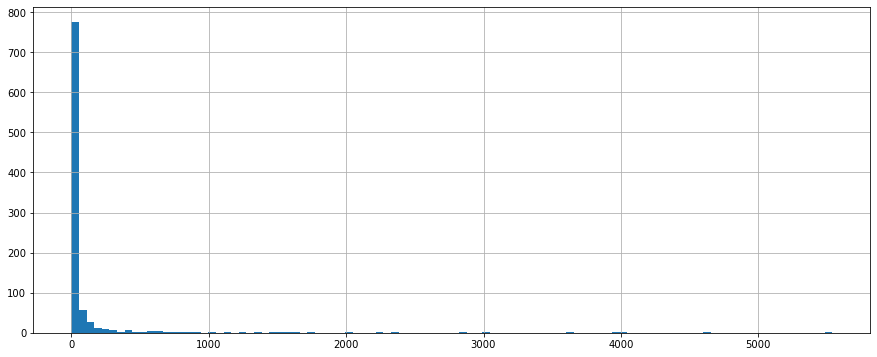

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,6
plot_df.hist(bins=100)

In [20]:
#Выши выводы: большинство игроков в течение первой недели установки сыграли в небольшое кол-во раундов,
#пик на гистограмме смещен влево 

Text(0.5, 0, '# Game rounds')

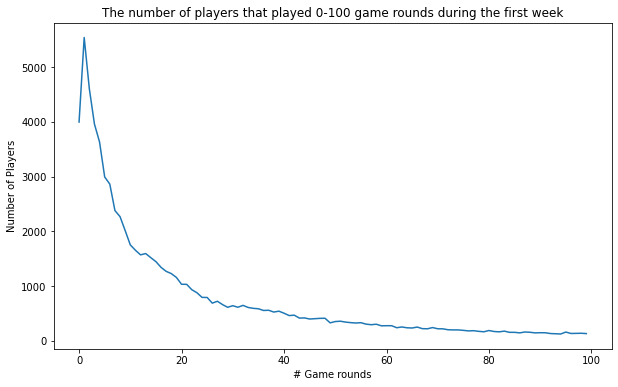

In [21]:
# Построим график распределения игроков, сыгравших от 0 до 100 игровых раундов в течение своей первой недели игры.
%matplotlib inline

ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title("The number of players that played 0-100 game rounds during the first week")
ax.set_ylabel("Number of Players")
ax.set_xlabel('# Game rounds')

In [22]:
#Ваши выводы: Большее кол-во игроков сыграли несколько раундов в первую неделю

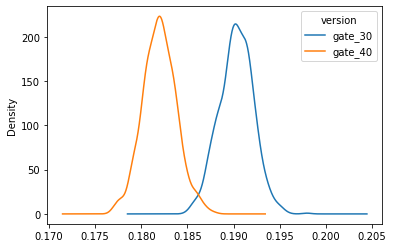

In [23]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1,replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

In [ ]:
# Ваши выводы: Из графиков видно, что для контрольной выборки кол-во оставшихся игроков больше (пик приблизительно на 0.183),
# чем для тестовой (пик приблизительно на 0.19) Напрашивается, что установка ограничения на 30-м уровне лучше, чем на 40. 
# Проверим наше предположение, что использование ограничения на 30-м уровне предпочтительнее.

In [24]:
# Разбиваем датасет на две выборки: тестовую и контрольную
level_30 = data[['retention_7']].loc[data.version == 'gate_30']
level_40 = data[['retention_7']].loc[data.version == 'gate_40']

In [25]:
#Используем дисперсионный анализ
from scipy.stats import f_oneway
f_oneway(level_30, level_40)

F_onewayResult(statistic=array([10.01405708]), pvalue=array([0.00155402]))

Вывод: 
Мы отвергаем нулевую гипотезу о равенстве средних, так как p_value меньше 0.05
Так как статистика положительна (10.01405708), то установка ограничений на уровне 30 статистически обоснована.